<a href="https://colab.research.google.com/github/Prethumnan/guvi-project/blob/main/Hand_written_digits_identification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries

import tensorflow
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Activation
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
import numpy as np

In [2]:
#Loading data

(x_train,y_train),(x_test,y_test)=tensorflow.keras.datasets.mnist.load_data()

#scaling data

x_train=x_train/255
x_test=x_test/255

#Reshaping the dimension

xtrain=x_train.reshape(60000,28,28,1)
xtest=x_test.reshape(10000,28,28,1)


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#First convolutional layer

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(xtrain[0].shape)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#second convolutional layer

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third convolutional layer
          
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
          
#First dense layer
          
model.add(Dense(64))
model.add(Activation("relu"))

#Second dense layer
          
model.add(Dense(32))
model.add(Activation("relu"))
          
#Output layer

model.add(Dense(10))
model.add(Activation("softmax"))

In [4]:
#Compling the model

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [5]:
#Training the model

model.fit(xtrain,y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 80s 42ms/step - loss: 0.2466 - accuracy: 0.9228
Epoch 2/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0783 - accuracy: 0.9761
Epoch 3/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0574 - accuracy: 0.9825
Epoch 4/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0444 - accuracy: 0.9863
Epoch 5/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 6/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 7/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0246 - accuracy: 0.9919
Epoch 8/15
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0211 - accuracy: 0.9933
Epoch 9/15
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0194 - accuracy: 0.9937
Epoch 10/15
1875/1875 [==============================] - 79s 42m

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [7]:
#Evaluvating the model
model.evaluate(xtest,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0570 - accuracy: 0.9874


[0.05702284723520279, 0.9873999953269958]

In [8]:
import cv2

In [9]:
image=cv2.imread("t.png")

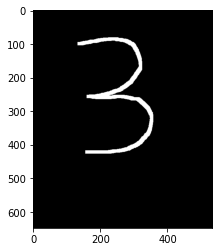

In [10]:
plt.imshow(image)

In [11]:
image.shape

(648, 534, 3)

In [12]:
#Converting color image to grey color with single channel
img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [13]:
img.shape

(648, 534)

In [14]:
#Resizing the pixels
new=cv2.resize(img,(28,28))

In [15]:
new.shape

(28, 28)

In [16]:
final=tensorflow.keras.utils.normalize(new)

In [17]:
result=final.reshape(-1,28,28,1)

In [20]:
#Predicting the image
m=model.predict(result)
np.argmax(m)

3

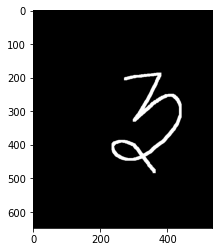

In [26]:
plt.imshow(cv2.imread("Three.png"))

In [21]:

#Creating a function to predict images using our trained model
def smart(im):
  image=cv2.imread(im)
  img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  new=cv2.resize(img,(28,28),interpolation=cv2.INTER_AREA)
  final=tensorflow.keras.utils.normalize(new)
  result=final.reshape(-1,28,28,1)
  m=model.predict(result)
  return np.argmax(m)


In [23]:
smart("Three.png")

3